pandas 是基于 Numpy 构建的，相比numpy专注于计算，pandas更多的用在数据处理方面

其有三种格式

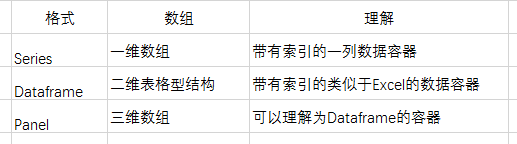

# Series

由一组数据和与之相关的索引组成。

In [3]:
# 创建一个Series：
import pandas as pd
s = pd.Series([1,3,5,7,6,8])
s

0    1
1    3
2    5
3    7
4    6
5    8
dtype: int64

In [4]:
s.index

RangeIndex(start=0, stop=6, step=1)

In [28]:
# 给series加上列名
s.name = 'x'
s

0    1
1    3
2    5
3    7
4    6
5    8
Name: x, dtype: int64

# Dataframe

DataFrame 是一个类似Excel表格的数据结构，其带有索引

创建一个DataFrame

In [6]:
d = {'one': [1, 2, 3], 'two': [1, 2, 3]}
df = pd.DataFrame(d,index=['a', 'b', 'c'])
df

,one,two
a,1,1
b,2,2
c,3,3


In [17]:
#创建一个空的 DataFrame
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [11]:
#查看行
df.index

Index(['a', 'b', 'c'], dtype='object')

In [12]:
# 查看列
df.columns

Index(['one', 'two'], dtype='object')

In [13]:
#查看元素
df.values

array([[1, 1],
       [2, 2],
       [3, 3]], dtype=int64)

In [19]:
# 一般性的 从api 获取的股票数据，都是dataframe结构
import tushare as ts
df = ts.get_hist_data('000001','2020-01-01')
type(df)

pandas.core.frame.DataFrame

### 从数据分析操作的角度来学习dataframe

查看前几行,查看后几行

In [22]:
import tushare as ts
df = ts.get_k_data('000001','2020-01-01')
df.head(10),df.tail(10)

(         date   open  close   high    low     volume    code
 0  2020-01-02  16.65  16.87  16.95  16.55  1530231.0  000001
 1  2020-01-03  16.94  17.18  17.31  16.92  1116194.0  000001
 2  2020-01-06  17.01  17.07  17.34  16.91   862083.0  000001
 3  2020-01-07  17.13  17.15  17.28  16.95   728607.0  000001
 4  2020-01-08  17.00  16.66  17.05  16.63   847824.0  000001
 5  2020-01-09  16.81  16.79  16.93  16.53  1031636.0  000001
 6  2020-01-10  16.79  16.69  16.81  16.52   585548.0  000001
 7  2020-01-13  16.75  16.99  17.03  16.61   872133.0  000001
 8  2020-01-14  16.99  16.76  17.27  16.76  1304493.0  000001
 9  2020-01-15  16.79  16.52  16.86  16.45   859439.0  000001,
            date   open  close   high    low     volume    code
 151  2020-08-18  15.20  15.15  15.30  14.91  1350261.0  000001
 152  2020-08-19  15.11  15.10  15.35  14.96  1420928.0  000001
 153  2020-08-20  15.01  14.59  15.14  14.53  1333802.0  000001
 154  2020-08-21  14.71  14.45  14.71  14.32  1234517.0  0000

In [26]:
#查看 DataFrame 的列名
list(df.columns)

['date', 'open', 'close', 'high', 'low', 'volume', 'code']

In [27]:
#查看DataFrame 信息
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 160
Data columns (total 7 columns):
date      161 non-null object
open      161 non-null float64
close     161 non-null float64
high      161 non-null float64
low       161 non-null float64
volume    161 non-null float64
code      161 non-null object
dtypes: float64(5), object(2)
memory usage: 10.1+ KB


In [31]:
# 将series转为dataframe
import pandas as pd
s = pd.Series([1,3,5,7,6,8])
s.name = 'x'
df= s.to_frame()
df

,x
0,1
1,3
2,5
3,7
4,6
5,8


### 在dataframe当中选取数据，主要通过下面几个函数

In [29]:
import tushare as ts
df = ts.get_k_data('000001','2020-01-01')
df.head(30)

,date,open,close,high,low,volume,code
0,2020-01-02,16.65,16.87,16.95,16.55,1530231.0,000001
1,2020-01-03,16.94,17.18,17.31,16.92,1116194.0,000001
2,2020-01-06,17.01,17.07,17.34,16.91,862083.0,000001
3,2020-01-07,17.13,17.15,17.28,16.95,728607.0,000001
4,2020-01-08,17.00,16.66,17.05,16.63,847824.0,000001
5,2020-01-09,16.81,16.79,16.93,16.53,1031636.0,000001
6,2020-01-10,16.79,16.69,16.81,16.52,585548.0,000001
7,2020-01-13,16.75,16.99,17.03,16.61,872133.0,000001
8,2020-01-14,16.99,16.76,17.27,16.76,1304493.0,000001
9,2020-01-15,16.79,16.52,16.86,16.45,859439.0,000001


df.loc[行标签,列标签]

In [33]:
# 选取0，1两行数据
df.loc[0:1]

,date,open,close,high,low,volume,code
0,2020-01-02,16.65,16.87,16.95,16.55,1530231.0,000001
1,2020-01-03,16.94,17.18,17.31,16.92,1116194.0,000001


In [36]:
#选取 某一列的数据
df.loc[0:5,'close']

0    16.87
1    17.18
2    17.07
3    17.15
4    16.66
5    16.79
Name: close, dtype: float64

In [42]:
# 选取某个值
df.loc[0,'close']

16.87

df.loc 的第一个参数是行标签，第二个参数为列标签，两个参数既可以是列表也可以
是单个字符，如果两个参数都为列表则返回的是 DataFrame，否则，则为 Series。

In [38]:
df.loc[0:5,'open':'low']

,open,close,high,low
0,16.65,16.87,16.95,16.55
1,16.94,17.18,17.31,16.92
2,17.01,17.07,17.34,16.91
3,17.13,17.15,17.28,16.95
4,17.00,16.66,17.05,16.63
5,16.81,16.79,16.93,16.53


df.iloc[行位置,列位置]

In [48]:
#选取第一行及第五行的数据
df.iloc[[0,5],:] 

,date,open,close,high,low,volume,code
0,2020-01-02,16.65,16.87,16.95,16.55,1530231.0,000001
5,2020-01-09,16.81,16.79,16.93,16.53,1031636.0,000001


In [49]:
#选取第一行到第三行（不包含）的数据
df.iloc[0:5,:] 

,date,open,close,high,low,volume,code
0,2020-01-02,16.65,16.87,16.95,16.55,1530231.0,000001
1,2020-01-03,16.94,17.18,17.31,16.92,1116194.0,000001
2,2020-01-06,17.01,17.07,17.34,16.91,862083.0,000001
3,2020-01-07,17.13,17.15,17.28,16.95,728607.0,000001
4,2020-01-08,17.00,16.66,17.05,16.63,847824.0,000001


In [51]:
#选取所有记录的第二列的值，返回的为一个Series
df.iloc[0:5,1] 

0    16.65
1    16.94
2    17.01
3    17.13
4    17.00
Name: open, dtype: float64

In [41]:
#选取第二行，第二列的值，返回的为单个值
df.iloc[1,1] 

16.94

获取某行有一个简单的写法

In [54]:
df.iloc[0]  #第一行

date       2020-01-02
open            16.65
close           16.87
high            16.95
low             16.55
volume    1.53023e+06
code           000001
Name: 0, dtype: object

In [55]:
df.iloc[-1]  #最后一行

date       2020-08-31
open             15.3
close           15.08
high            15.68
low             14.99
volume    1.79713e+06
code           000001
Name: 160, dtype: object

更广义的切片方式是使用.ix，它自动根据给到的索引类型判断是使用位置还是标签进行切片

df.ix[]  #但这个被抛弃了

In [3]:
df.ix[0:5,'open':'low']

d:\vn studio\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,open,close,high,low
0,16.65,16.87,16.95,16.55
1,16.94,17.18,17.31,16.92
2,17.01,17.07,17.34,16.91
3,17.13,17.15,17.28,16.95
4,17.00,16.66,17.05,16.63
5,16.81,16.79,16.93,16.53


使用isin()方法来过滤在指定列中的数据

In [5]:
# 选取 high 列中数为 1 和 774.00 的数。
df[df['high'].isin([17.31,16.34])]

,date,open,close,high,low,volume,code
1,2020-01-03,16.94,17.18,17.31,16.92,1116194.0,000001
13,2020-01-21,16.34,16.00,16.34,15.93,896603.0,000001


插入一列

In [36]:
import tushare as ts
df = ts.get_k_data('000001','2020-01-01')
del df['code']

In [35]:
df.insert(0,'code','000001')

,code,date,open,close,high,low,volume
0,000001,2020-01-02,16.65,16.87,16.95,16.55,1530231.0
1,000001,2020-01-03,16.94,17.18,17.31,16.92,1116194.0
2,000001,2020-01-06,17.01,17.07,17.34,16.91,862083.0
3,000001,2020-01-07,17.13,17.15,17.28,16.95,728607.0
4,000001,2020-01-08,17.00,16.66,17.05,16.63,847824.0
5,000001,2020-01-09,16.81,16.79,16.93,16.53,1031636.0
6,000001,2020-01-10,16.79,16.69,16.81,16.52,585548.0
7,000001,2020-01-13,16.75,16.99,17.03,16.61,872133.0
8,000001,2020-01-14,16.99,16.76,17.27,16.76,1304493.0
9,000001,2020-01-15,16.79,16.52,16.86,16.45,859439.0


二维数组转为dataframe

In [41]:
import numpy as np
import pandas as pd
a = [[1,2,3],[2,3,4],[2,5,3]]
array1 = np.array(a)
df = pd.DataFrame(array1)
df.columns = ['x','y','z']
print(df)

   x  y  z
0  1  2  3
1  2  3  4
2  2  5  3


二维数组作为新列添加到dataframe

In [48]:
import numpy as np
import pandas as pd
df1 = pd.DataFrame({'a':['a','b','c']})
a = [[1,2,3],[2,3,4],[2,5,3]]
array1 = np.array(a)
df2 = pd.DataFrame(array1)
df2.columns = ['x','y','z']
df = pd.concat([df1,df2],axis=1)
print(df)

   a  x  y  z
0  a  1  2  3
1  b  2  3  4
2  c  2  5  3


### 遍历dataframe

In [43]:
for i in df.index:
    print(i)

0
1
2


In [45]:
for index,row in df.iterrows():
    print(index)
    print(row)

0
a    a
x    1
y    2
z    3
Name: 0, dtype: object
1
a    b
x    2
y    3
z    4
Name: 1, dtype: object
2
a    c
x    2
y    5
z    3
Name: 2, dtype: object


In [49]:
for i in range(len(df)):
    print(df.iloc[i,0])

a
b
c


从部分dataframe一部分获取最大值

In [55]:
import tushare as ts
df = ts.get_k_data('000001','2020-01-01')

In [56]:
max = df.loc[1:120,'close'].max()
max

17.18

获取最大值的索引

In [57]:
index1 = df.loc[1:120,'close'][df.loc[1:120,'close']==max].index
index1

Int64Index([1], dtype='int64')

判断dataframe是否为空

In [58]:
import pandas as pd
df = pd.DataFrame()
df

""


In [60]:
if df.empty==True:
    print(1)

1


多个条件筛选

In [62]:
import tushare as ts
df = ts.get_hist_data('000001','2020-08-01')
df

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2020-09-03,15.32,15.33,14.90,14.84,1279841.62,-0.42,-2.74,15.114,14.791,14.638,1596079.36,1224346.78,1416673.61,0.66
2020-09-02,15.01,15.53,15.32,15.01,1679383.00,0.18,1.19,15.026,14.760,14.588,1465444.39,1229742.78,1420307.07,0.87
2020-09-01,14.96,15.23,15.14,14.88,813642.56,0.06,0.40,14.836,14.738,14.510,1276391.34,1203897.29,1408348.08,0.42
2020-08-31,15.30,15.68,15.08,14.99,1797129.62,-0.05,-0.33,14.728,14.739,14.455,1263326.87,1257559.15,1489949.11,0.93
2020-08-28,14.26,15.18,15.13,14.26,2410400.00,0.67,4.63,14.604,14.750,14.380,1087790.73,1404648.96,1472347.44,1.24
2020-08-27,14.40,14.46,14.46,14.11,626666.75,0.09,0.63,14.468,14.684,14.291,852614.20,1273930.55,1410118.53,0.32
2020-08-26,14.60,14.61,14.37,14.28,734117.75,-0.23,-1.57,14.494,14.656,14.236,994041.18,1294990.05,1426988.58,0.38
2020-08-25,14.56,14.69,14.60,14.46,748320.25,0.14,0.97,14.640,14.657,14.195,1131403.25,1381259.44,1466261.71,0.39
2020-08-24,14.50,14.71,14.46,14.41,919448.88,0.01,0.07,14.750,14.610,14.132,1251791.42,1566758.19,1489695.99,0.47


In [64]:
a = df.p_change>0
b = df.ma5>df.ma10
c = df.ma5>df.ma20
d = df.turnover>0.8
df = df[a & (b | c) & d]
df

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2020-09-02,15.01,15.53,15.32,15.01,1679383.00,0.18,1.19,15.026,14.760,14.588,1465444.39,1229742.78,1420307.07,0.87
2020-08-28,14.26,15.18,15.13,14.26,2410400.00,0.67,4.63,14.604,14.750,14.380,1087790.73,1404648.96,1472347.44,1.24
2020-08-17,14.60,15.35,15.19,14.55,3268027.75,0.72,4.98,14.470,14.170,13.927,1881724.95,1722339.08,1591992.04,1.68
2020-08-12,14.21,14.50,14.38,14.15,1596811.62,0.25,1.77,14.012,13.816,13.886,1625803.78,1558987.10,1591660.28,0.82
2020-08-11,13.97,14.66,14.13,13.97,2603307.75,0.18,1.29,13.888,13.732,13.880,1594482.10,1551263.98,1613947.84,1.34
2020-08-10,13.67,14.02,13.95,13.62,1587710.38,0.25,1.82,13.870,13.653,13.908,1562953.20,1412633.80,1581460.77,0.82


排序

In [65]:
type(df.index)

pandas.core.indexes.base.Index

In [66]:
# 日期是索引，按日期排序
df.sort_index()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2020-08-10,13.67,14.02,13.95,13.62,1587710.38,0.25,1.82,13.870,13.653,13.908,1562953.20,1412633.80,1581460.77,0.82
2020-08-11,13.97,14.66,14.13,13.97,2603307.75,0.18,1.29,13.888,13.732,13.880,1594482.10,1551263.98,1613947.84,1.34
2020-08-12,14.21,14.50,14.38,14.15,1596811.62,0.25,1.77,14.012,13.816,13.886,1625803.78,1558987.10,1591660.28,0.82
2020-08-17,14.60,15.35,15.19,14.55,3268027.75,0.72,4.98,14.470,14.170,13.927,1881724.95,1722339.08,1591992.04,1.68
2020-08-28,14.26,15.18,15.13,14.26,2410400.00,0.67,4.63,14.604,14.750,14.380,1087790.73,1404648.96,1472347.44,1.24
2020-09-02,15.01,15.53,15.32,15.01,1679383.00,0.18,1.19,15.026,14.760,14.588,1465444.39,1229742.78,1420307.07,0.87


In [102]:
import tushare as ts
df = ts.get_k_data('000001','2020-08-01')
df

,date,open,close,high,low,volume,code
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001
145,2020-08-10,13.67,13.95,14.02,13.62,1587710.0,000001
146,2020-08-11,13.97,14.13,14.66,13.97,2603308.0,000001
147,2020-08-12,14.21,14.38,14.50,14.15,1596812.0,000001
148,2020-08-13,14.40,14.18,14.46,14.14,837262.0,000001
149,2020-08-14,14.10,14.47,14.51,14.06,1103216.0,000001


In [103]:
type(df.date[140])

str

In [108]:

df.date = pd.to_datetime(df.date)

pandas._libs.tslibs.timestamps.Timestamp

In [72]:
#日期不是索引，将df按照日期排序
df.sort_values(by='date',ascending=False,inplace=True)
df

,date,open,close,high,low,volume,code
163,2020-09-03,15.32,14.90,15.33,14.84,1279842.0,000001
162,2020-09-02,15.01,15.32,15.53,15.01,1679383.0,000001
161,2020-09-01,14.96,15.14,15.23,14.88,813643.0,000001
160,2020-08-31,15.30,15.08,15.68,14.99,1797130.0,000001
159,2020-08-28,14.26,15.13,15.18,14.26,2410400.0,000001
158,2020-08-27,14.40,14.46,14.46,14.11,626667.0,000001
157,2020-08-26,14.60,14.37,14.61,14.28,734118.0,000001
156,2020-08-25,14.56,14.60,14.69,14.46,748320.0,000001
155,2020-08-24,14.50,14.46,14.71,14.41,919449.0,000001
154,2020-08-21,14.71,14.45,14.71,14.32,1234517.0,000001


再重新设置索引

In [73]:
df.reset_index(drop = True,inplace=True)
df

,date,open,close,high,low,volume,code
0,2020-09-03,15.32,14.90,15.33,14.84,1279842.0,000001
1,2020-09-02,15.01,15.32,15.53,15.01,1679383.0,000001
2,2020-09-01,14.96,15.14,15.23,14.88,813643.0,000001
3,2020-08-31,15.30,15.08,15.68,14.99,1797130.0,000001
4,2020-08-28,14.26,15.13,15.18,14.26,2410400.0,000001
5,2020-08-27,14.40,14.46,14.46,14.11,626667.0,000001
6,2020-08-26,14.60,14.37,14.61,14.28,734118.0,000001
7,2020-08-25,14.56,14.60,14.69,14.46,748320.0,000001
8,2020-08-24,14.50,14.46,14.71,14.41,919449.0,000001
9,2020-08-21,14.71,14.45,14.71,14.32,1234517.0,000001


In [109]:
df.set_index('date',inplace=True)
df

,open,close,high,low,volume,code
date,,,,,,
2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001
2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001
2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001
2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001
2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001
2020-08-10,13.67,13.95,14.02,13.62,1587710.0,000001
2020-08-11,13.97,14.13,14.66,13.97,2603308.0,000001
2020-08-12,14.21,14.38,14.50,14.15,1596812.0,000001
2020-08-13,14.40,14.18,14.46,14.14,837262.0,000001


concat 可以沿一条轴将多个对象堆叠到一起。
分别获取两个DataFrame。

In [111]:
import tushare as ts
df1 = ts.get_k_data('000001','2020-08-01','2020-08-07')
df1

,date,open,close,high,low,volume,code
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001


In [112]:
df2 = ts.get_k_data('000001','2020-08-10','2020-08-15')
df2

,date,open,close,high,low,volume,code
145,2020-08-10,13.67,13.95,14.02,13.62,1587710.0,000001
146,2020-08-11,13.97,14.13,14.66,13.97,2603308.0,000001
147,2020-08-12,14.21,14.38,14.50,14.15,1596812.0,000001
148,2020-08-13,14.40,14.18,14.46,14.14,837262.0,000001
149,2020-08-14,14.10,14.47,14.51,14.06,1103216.0,000001


In [114]:
df3 = pd.concat([df1,df2],axis=0)
df3

,date,open,close,high,low,volume,code
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001
145,2020-08-10,13.67,13.95,14.02,13.62,1587710.0,000001
146,2020-08-11,13.97,14.13,14.66,13.97,2603308.0,000001
147,2020-08-12,14.21,14.38,14.50,14.15,1596812.0,000001
148,2020-08-13,14.40,14.18,14.46,14.14,837262.0,000001
149,2020-08-14,14.10,14.47,14.51,14.06,1103216.0,000001


In [117]:
df4 = pd.concat([df1,df2],axis=1)
df4

,date,open,close,high,low,volume,code,date,open,close,high,low,volume,code
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-10,13.67,13.95,14.02,13.62,1587710.0,000001
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-11,13.97,14.13,14.66,13.97,2603308.0,000001
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-12,14.21,14.38,14.50,14.15,1596812.0,000001
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-13,14.40,14.18,14.46,14.14,837262.0,000001
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-14,14.10,14.47,14.51,14.06,1103216.0,000001


只增加一行

In [121]:
s = df1.iloc[0]
df1 = df1.append(s, ignore_index=False) # ignore_index=False 表示索引不变
df1

,date,open,close,high,low,volume,code
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001


查看重复数据：

In [122]:
df1.duplicated()

140    False
141    False
142    False
143    False
144    False
140     True
dtype: bool

移除重复数据：

In [123]:
df1.drop_duplicates()

,date,open,close,high,low,volume,code
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001


In [124]:
df1['high_cahnge']=df1.high-df1.high.shift(1)
df1

,date,open,close,high,low,volume,code,high_cahnge
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001,NaN
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001,0.53
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001,-0.30
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001,0.11
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001,-0.06
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001,-0.28


In [130]:
df1['low_cahnge']=df1.low-df1.low.shift(-2)
df1

,date,open,close,high,low,volume,code,high_cahnge,low_cahnge
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001,NaN,-0.19
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001,0.53,-0.17
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001,-0.30,0.00
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001,0.11,0.22
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001,-0.06,NaN
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001,-0.28,NaN


In [126]:
#去掉包含缺失值的行
df1.dropna()

,date,open,close,high,low,volume,code,high_cahnge,low_cahnge
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001,0.53,-0.17
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001,-0.30,0.00
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001,0.11,0.22


对缺失值进行填充为30

In [129]:
df1.fillna(value=30)

,date,open,close,high,low,volume,code,high_cahnge,low_cahnge
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001,30.00,-0.19
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001,0.53,-0.17
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001,-0.30,0.00
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001,0.11,0.22
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001,-0.06,30.00
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001,-0.28,30.00


筛选排除掉空值

In [131]:
df1 = df1.loc[df1['high_cahnge'].isna()==False] 
df1

,date,open,close,high,low,volume,code,high_cahnge,low_cahnge
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001,0.53,-0.17
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001,-0.30,0.00
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001,0.11,0.22
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001,-0.06,NaN
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001,-0.28,NaN


保留两位小数

In [132]:
df1.loc[:,'high_cahnge'] = round(df1.loc[:,'high_cahnge'],1)
df1

d:\vn studio\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,date,open,close,high,low,volume,code,high_cahnge,low_cahnge
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001,0.5,-0.17
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001,-0.3,0.00
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001,0.1,0.22
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001,-0.1,NaN
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001,-0.3,NaN
